<center> <H1> Testing H1: BrU-dimensions defines FASTKD2-dimensions of individual MRGs </H1> </center>


                        *Code written by Timo Rey. Laboratory of Experimental Biophysics, EPFL*

                                            *Created for revisions in 2020*

#### Aims:
    To test whether the physical dimensions of the RNA component (BrU) correlates with the dimensions of the protein components (FASTKD2) in individual mitochondrial RNA granules.

#### H0:
    There is no correlation between the size of BrU and the size of FASTKD2 within individual MRGs.
    
#### Approach:
    1) Load descriptors for all granules from two-colour STORM measurements.
        .csv files containing cluster-descriptors, as output from MATLAB code.
    2) Plot size of BrU-, and FASTKD2-components for each MRG. 
    3) Correlation analysis

In [1]:
#load libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
from statannot import add_stat_annotation
import PIL
from matplotlib.patches import Ellipse
from math import pi

In [2]:
# 0.1) create dictionary with all FOVs to analyse:
Dates = ['20181108', '20191212', '20200211', '20200219']
FOVs  = [[11],[2,3,5,7,8,12],[1,2],[9,10,12]]
# 0.2) specify common root-directory:
baseDir = "C:/Users/Public/Documents/03_Architecture/02_STORM_2C/03_processedData/"
outDir  = "C:/Users/Public/Documents/03_Architecture/02_STORM_2C/04_Analysis/"
# 0.3) create empty dataframe:
DATA_2C = pd.DataFrame()

In [3]:
for h in [1,2,3]:
    files = {Dates[h]: FOVs[h]}
    print(files)
    
    for i in files:                                                      # for every day

    # 1) For every FOV 'i', load data
        for j in files[str(i)]:                                          # for every FOV
            # 1.4) load cluster descriptors:
            clusterDir   = baseDir+"Output/"
            clusterFile  = clusterDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_TR_COS7_BrU-A647_FOV_' + str(j) + '_DBSCAN_filtered.csv'
            cluster_df   = pd.read_csv(clusterFile, sep = ',',names=['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'overlap [%]', 'Distance_CoM','Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'roiID'])
            # Calculate remaining cluster descriptors:
            cluster_df['Diameter_1']             = (cluster_df['Length_1']+cluster_df['Width_1'])
            cluster_df['FWHM_1']                 = (cluster_df['Diameter_1']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma 
            cluster_df['Diameter_2']             = (cluster_df['Length_2']+cluster_df['Width_2'])
            cluster_df['FWHM_2']                 = (cluster_df['Diameter_2']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma
        
            DATA_2C                              = pd.concat([DATA_2C, cluster_df])

{'20191212': [2, 3, 5, 7, 8, 12]}
{'20200211': [1, 2]}
{'20200219': [9, 10, 12]}


In [4]:
DATA_2C

,Rg_1,Ecc_1,Length_1,Width_1,ConvexHull_1,overlap [%],Distance_CoM,Rg_2,Ecc_2,Length_2,Width_2,ConvexHull_2,roiID,Diameter_1,FWHM_1,Diameter_2,FWHM_2
0,58.401,2.5511,54.409,21.328,22691.0,0.98215,85.391,146.160,3.1803,139.450,43.847,124610.0,2,75.737,89.173503,183.297,215.815725
0,46.964,1.4353,38.594,26.889,14173.0,1.00000,12.028,76.803,1.7634,66.852,37.912,48809.0,1,65.483,77.100341,104.764,123.350184
1,70.919,1.9089,62.866,32.932,32364.0,0.72355,21.510,66.467,1.2093,51.274,42.399,33171.0,2,95.798,112.793525,93.673,110.291529
2,72.220,1.9987,64.621,32.331,35367.0,1.00000,49.463,110.170,1.7507,95.706,54.667,83332.0,3,96.952,114.152257,150.373,177.050677
3,93.838,1.5597,79.013,50.658,69641.0,0.85277,94.548,109.710,1.2215,84.908,69.513,114120.0,4,129.671,152.675935,154.421,181.816833
4,82.144,1.3203,65.511,49.617,42937.0,0.59673,44.959,73.643,1.0837,54.150,49.966,46828.0,5,115.128,135.552861,104.116,122.587222
0,68.879,1.6512,58.949,35.701,30004.0,0.89541,62.954,111.210,1.2224,86.116,70.450,93374.0,1,94.650,111.441859,156.566,184.342378
1,66.174,1.4376,54.356,37.810,31529.0,1.00000,28.220,111.600,1.6298,95.148,58.380,88343.0,2,92.166,108.517172,153.528,180.765406
0,116.940,2.5542,108.920,42.645,78228.0,1.00000,42.530,143.440,1.5519,120.580,77.697,286490.0,1,151.565,178.454150,198.277,233.453327
1,85.327,1.3773,69.074,50.153,53133.0,1.00000,46.986,137.050,1.5470,115.100,74.404,225360.0,2,119.227,140.379065,189.504,223.123909


##### for 2018:
adapt file-naming

In [5]:
files = {Dates[0]: [11]}
for i in files:                                                      # for every day
# 1) For every FOV 'i', load data
    for j in files[str(i)]:                                          # for every FOV
# 1.4) load cluster descriptors:
        clusterDir   = baseDir+"Output/"
        clusterFile  = clusterDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_COS7_BrU-A647_FOV_' + str(j) + '_DBSCAN_filtered.csv'
        cluster_df   = pd.read_csv(clusterFile, sep = ',',names=['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'overlap [%]', 'Distance_CoM','Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'roiID'])
        # Calculate remaining cluster descriptors:
        cluster_df['Diameter_1']             = (cluster_df['Length_1']+cluster_df['Width_1'])
        cluster_df['FWHM_1']                 = (cluster_df['Diameter_1']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma 
        cluster_df['Diameter_2']             = (cluster_df['Length_2']+cluster_df['Width_2'])
        cluster_df['FWHM_2']                 = (cluster_df['Diameter_2']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma        
        
        DATA_2C                              = pd.concat([DATA_2C, cluster_df])
        
len(DATA_2C)

26

In [6]:
DATA_2C = DATA_2C.drop_duplicates()
DATA_2C = DATA_2C.reset_index(drop=True)
len(DATA_2C)

26

In [7]:
# save as table:
DATA_2C.to_csv(outDir+'2C_data.csv')

# Make plots:

Correlation Coefficient between mtRNA diameter and FASTKD2 diameter:  0.25901862375864704


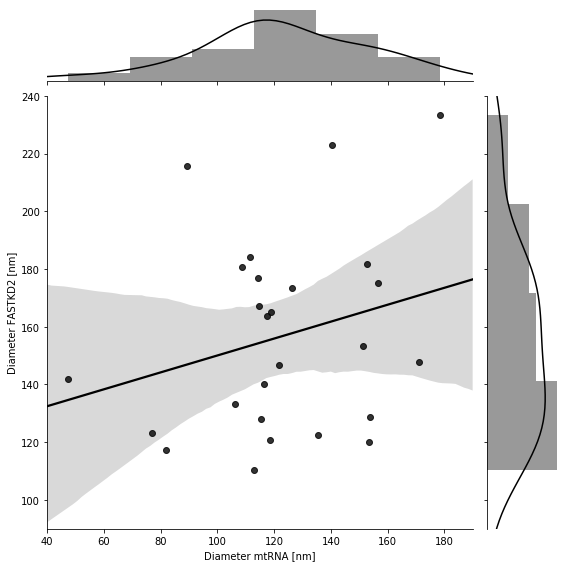

In [8]:
#f, ax = plt.subplots()
g = sns.jointplot("FWHM_1", "FWHM_2", data=DATA_2C, kind="reg", truncate = False, color="k",
              xlim = (40,190), ylim = (90,240), height = 8)
g.set_axis_labels("Diameter mtRNA [nm]", "Diameter FASTKD2 [nm]")

correlation = np.corrcoef(DATA_2C['FWHM_1'], DATA_2C['FWHM_2'])
print('Correlation Coefficient between mtRNA diameter and FASTKD2 diameter: ', correlation[0,1])

g.savefig(outDir+"2C_correlationFWHM.svg")

Correlation Coefficient between mtRNA Eccentricity and FASTKD2 Eccentricity:  0.4263552034407851


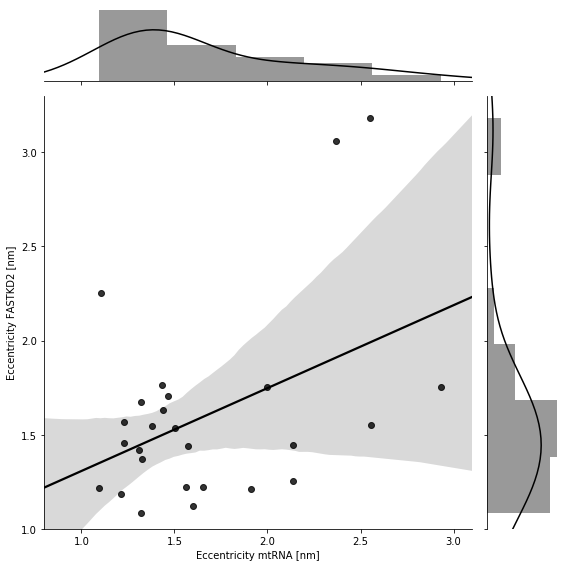

In [9]:
#f, ax = plt.subplots()
g = sns.jointplot("Ecc_1", "Ecc_2", data=DATA_2C, kind="reg", truncate = False, color="k",
              xlim = (0.8,3.1), ylim = (1,3.3), height = 8)
g.set_axis_labels("Eccentricity mtRNA [nm]", "Eccentricity FASTKD2 [nm]")

correlation = np.corrcoef(DATA_2C['Ecc_1'], DATA_2C['Ecc_2'])
print('Correlation Coefficient between mtRNA Eccentricity and FASTKD2 Eccentricity: ', correlation[0,1])

g.savefig(outDir+"2C_correlationEcc.svg")